## ARTIFICIAL INTELLIGENCE FUNDAMENTALS PROJECT 2024/2025 - Charisardo Team 

[Github repository](https://github.com/sypeeoui/Charisardo) 

### 1. Introduction

Our project focused on the design and implementation of several agent algorithms capable of engaging in Pokémon battles with randomly selected teams, determining the best move from those available. 
The task was part of the battle track of the VGC AI Competition 2024.
We simulated the battles using the VGC AI Framework, which we modified to introduce non-determinism and to add additional features to the Pokémon. <br>
We developed four strategies using two approaches:
* Greedy search: *Heuristical*, *WeightedGreedy* and *WeightedGreedy2*
* Minimax search with alpha-beta pruning: *PrunedTreeSearch2*


### 2. Related works

To build the Pokémon teams and simulate the battles we used [VGC AI framework](https://gitlab.com/DracoStriker/pokemon-vgc-engine), an environment designed to emulate the scenario of human video game championships of Pokémon with AI agents, including the game balance aspect. 
We used the policies already implemented in the framework as a benchmark to evaluate our algorithms. More information about the VCG AI framework are avaiable in the related [paper](https://ieeexplore.ieee.org/document/9618985). <br>
We also compared our strategies to the two best competitors in the 2024 competition, *[Punisher](https://gitlab.com/DracoStriker/pokemon-vgc-engine/-/tree/master/competition/vgc2024/Punisher%20-%20Knulon?ref_type=heads)*, implemented by Daniel Ladwig and Marlon Hörner, and *[hayo5_BattlePolicy](https://gitlab.com/DracoStriker/pokemon-vgc-engine/-/tree/master/competition/vgc2024/HayoBot%20-%20%EC%A1%B0%ED%95%98%EC%98%81?ref_type=heads)*, created by Jo Ha Young. <br>
To design and implement some of our algorithms we referred to the textbook *Artificial Intelligence: a Modern Approach*, by Russell and Norvig, in particular chapters 3.5, 5.2 and 5.3.

### 3. Environment and task

Pokémon battles are conducted between two players, each controlling a team of three Pokémon, of which one is active and the others are party. Each Pokémon can perform four specific moves, characterized by type, maximum power, accuracy, and maximum PP.

At each turn, players can either select one of the four moves for the active Pokémon to perform, or choose to switch the active Pokémon with one of the other non active Pokémons in the party. The choice making of a player is represented by an algorithm (referred to as Battle Policy) that can access all Pokémon statistics (both of itself and of the opponent) and current state of the game, and has to return one of the possible actions. Neither player knows what action the other player will take until the end of this choosing phase. After both players chose what to do during that turn, one of the two players is randomly selected to play first, and the turn is simulated accordingly. When a Pokémon's HP reaches zero, it faints, forcing the player to switch to another Pokémon. The match continues until all Pokémon on one team have fainted, at which point the opposing player is declared the winner.

Our goal is to develop a gameplay strategy that allows us to compete with a randomly generated team against any opponent, spending a reasonable amount of time.

#### 3.1 Team generation

To generate teams, we implemented the function *OwnTeamGenerator()*, which randomly selects the characteristics of the moves for the Pokémon in the team. This function also enabled us to vary the accuracy, i.e., the success rate of moves, which in the original framework was always set to 1. By introducing this non-deterministic element, we increased the complexity of the game.

### 4. Methodologies

In the following we will explain the functioning of our four strategies.

#### 4.1 PrunedTreeSearch 1/2

The first minimax algorithm we implemented is a depth-limited tree search with alpha-beta pruning. Such pruning allows us to substantially reduce the number of nodes to expand, thus speeding up the search. 

##### 4.1.2 PrunedTreeSearch

Each depth level is split in two phases: the maximizing phase, in which all the moves of the first player are took in consideration, and the minimizing one, which takes into consideration all the moves of the second player. Furthermone, in the minimizing phase one game step is simulated to evaluate the outcome of that specific combination of moves. Since the game is non-deterministic due to the modifications we made to the framework, we need to expand each phase in two mutually excluding cases: the player hits the move or the player misses the move.
Once both mutually excluding cases are evaluated, an expected value of such move is calculated by doing the weighted average of the two cases.

Since critical hits are possible in the game, the search is re-applied a fixed number of times to evaluate if in the majority of cases the move is actually the best one, effectively reducing the aleatority of this dynamic.

The second minimax algorithm is an optimization of the first one, in which if the accuracy of the move is over 0.9 the case in which the move misses is not expanded, thus considering the move reliable enough and speeding up the search.

#### 4.2 Heuristical

The Heuristical algorithm tries to predict and calculate the probability of winning in a simplified scenario where all Pokémons have one move. The idea is that, if two Pokémons are 1v1 they will probably always use one move, that is the best move they have. Therefore, each Pokémon has HP (Health Points left), d (damage dealt by the best move) and p (probability that the move will actually strike). 

Given HP1, d1, p1 and HP2, d2, p2, what is the probability that Pokémon 1 will win? We calculated this probability exactly, using dinamic programming, and then built an algorithm based on this approximation. 

The algorithm starts by calculating the probability of winning for the active Pokémon, then it calculates the same probability for the Pokémons in the party (taking in account the fact that they lose one turn for switching), and then take the action that maximizes the probability. 

Obviously this is just an Heuristic because of some approximations, for example the best move for a given Pokémon is calculated as the move with highest expected damage, but that is not always the case.

#### 4.3 WeightedGreedy 1/2

We tested a greedy algorithm that selects the move with the highest expected value for the damage. Calculated by simulating the inflicted damage for each move and multiplying by the accuracy. If by switching Pokémon the expected value is higher than a factor (i. e. 2), the algorithm switches the Pokémon.

The second greedy algorithm is similar to the first one, but it also considers the opponent's best greedy damage and takes the best move that maximizes the difference between the two.

Surprisingly these two simple algorithms performed better overall as shown in the results section.

### 5. Assessment

We evaluated the performance of our algorithms comparing them to each other, to the two best policies of 2024 competition (*'Punisher'*, the winner, and *'hayo5_BattlePolicy'*, second place) and to six policies already implemented in the framework: *'RandomPlayer'*, *'TypeSelector'*, *'BreadthFirstSearch'*, *'OneTurnLookahead'*, *'PrunedBFS'* and *'TunedTreeTraversal'*. 

We simulated 600 battles for each combination of policies changing the composition of the two teams. We used win rate, number of turns and required time as evaluation metrics. To balance the assessment, for every battle between two player we do 2 battles with the same team composition and switch the player that starts first.
 
#### 5.1 Win rate 

For each combination of policies, we calculated the rate of won matches over the total. Results are shown in **Figure 1**, where our algorithms are highlighted with two asterisks and the competition winners are indicated by one asterisk. The strategies are ordered by the total win rate, which is reported in the last column.<br> 

We can see that our strategies have a good performance against *RandomPlayer*, in particular the greedy approaches have a win rate higher than 0.85, and they are the 3 best policies between the 12 proposed. *PrunedTreeSearch* has a similar win rate, while *Heuristical* perform slightly worse, but it still have a good result, much higher than 0.50. <br>

With respect to the total win rate, we can see that our weighted greedy approaches have again the highest results, followed by *OneTurnLookAhead* and *Punisher*, two others greedy strategies. The success of the greedy approaches is probably due to the randomness of the game: it's unlikely that randomly selected Pokémons can combine their moves to obtain a particularly effective strategy, so maximizing the utility of next move is often the best choice, and the key is to define a good heuristic function to represent utility. <br>
Between the tree search approaches our agent perform the best together with *BreadthFirstSearch*. <br>

Anyway, considering the total win rate, no policy have clearly better results (all results are below 0.60), but our best agents are quite good against the weakest benchmark agents (*RandomPlayer*, *TunedTreeTraversal* and *PrunedBFS*).

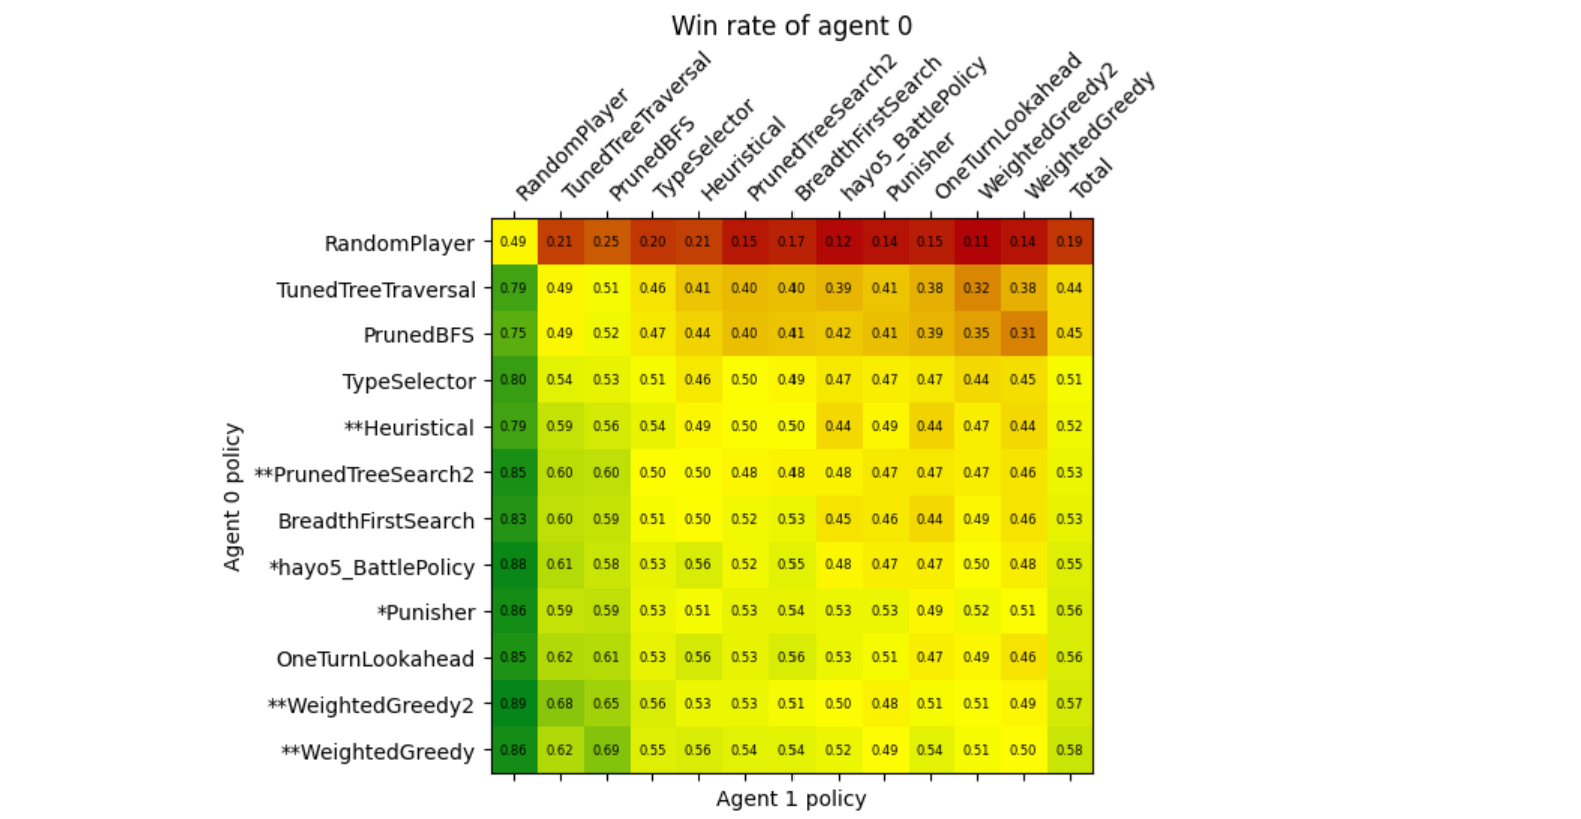 <br>
###### **Figure 1**: Win rate for all combination of policies and total value for each policy

#### 5.2 Number of turns

To evaluate the efficacy of each strategy we also observed the mean number of turns required to end a battle, shown in **Figure 2**. We can see that for most strategies the value is between 6 and 7, with very small differences for policies from *BredthFirstSearch* to *WeightedGreedy*. *Heuristical* has the highest value excluding *RandomPlayer*, but it's still under 7. <br>

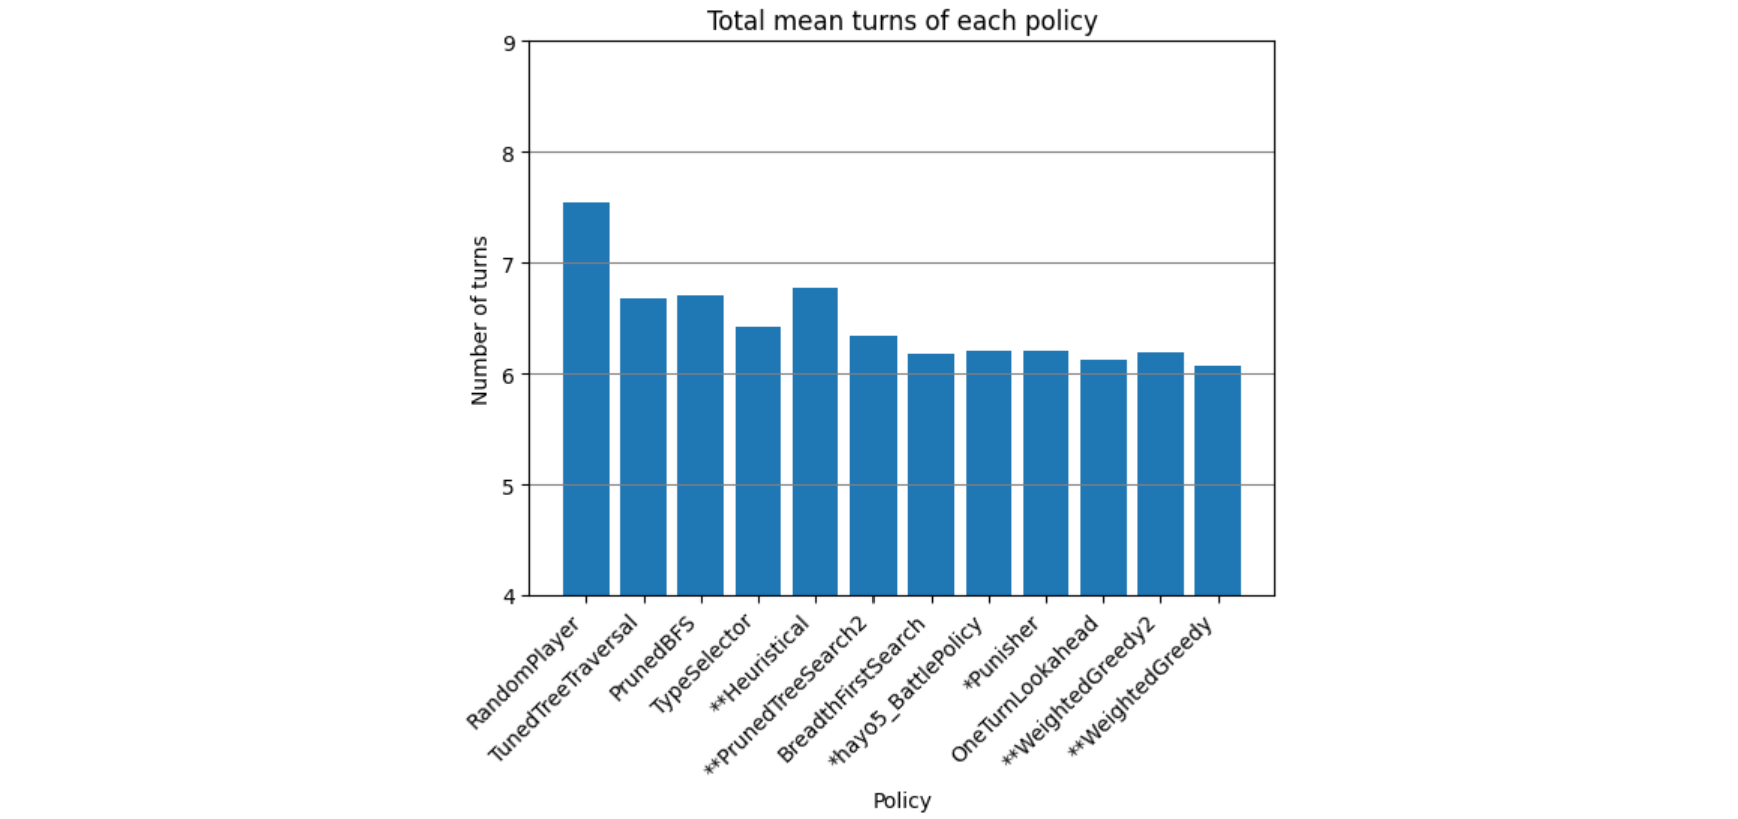 <br>
###### **Figure 2**: Mean number of turn required to end a battle for each policy

#### 5.3 Time
Finally, since the performances of the policies were similar in terms of win rate and number of turns, we evaluated the average time needed by each strategy to choose the move. The results are presented in **Figure 3**. As clearly evident in **Figure 3a)**, our policy *PrunedTreeSearch2* is much slower than the others, making it unusable, expecially considering its non outstanding results in terms of win rate and number of turns. <br>
In **Figure 3b)** there is a focus on the range [0 - 0.7] s, and we can see that our best agents are still much slower than comparably approaches which perform slightly worse: *hayo5_BattlePolicy* has a mean time of 4.1e-05 s, *Punisher* of 1.1e-05 and *OneTurnLookahead* of 1.6e-05, while *WeightedGreedy* and *WeightedGreedy2* are 3.0e-02 and 6.1e-02 respectevely. Heuristical is faster, with a time of 3.9e-03 s, but still slower than other strategies. <br>
Regarding our policies, we can observe that *WeightedGreedy2*, which is a modification of *WeightedGreedy*, requires a double time, without an improvement in battle outcome. <br>

Probably the biggest weakness of our policies is the computational time, expecially compared to *OneTurnLookAhead*, *Punisher* and *hayo5_BattlePolicy*. This difference may be due to the complexity added to the game setting a random accuracy, which forced our agents to more considerations. Anyway, we think that the time required by our strategies (with exception of *PrunedTreeSearch*) is not too high for this task.

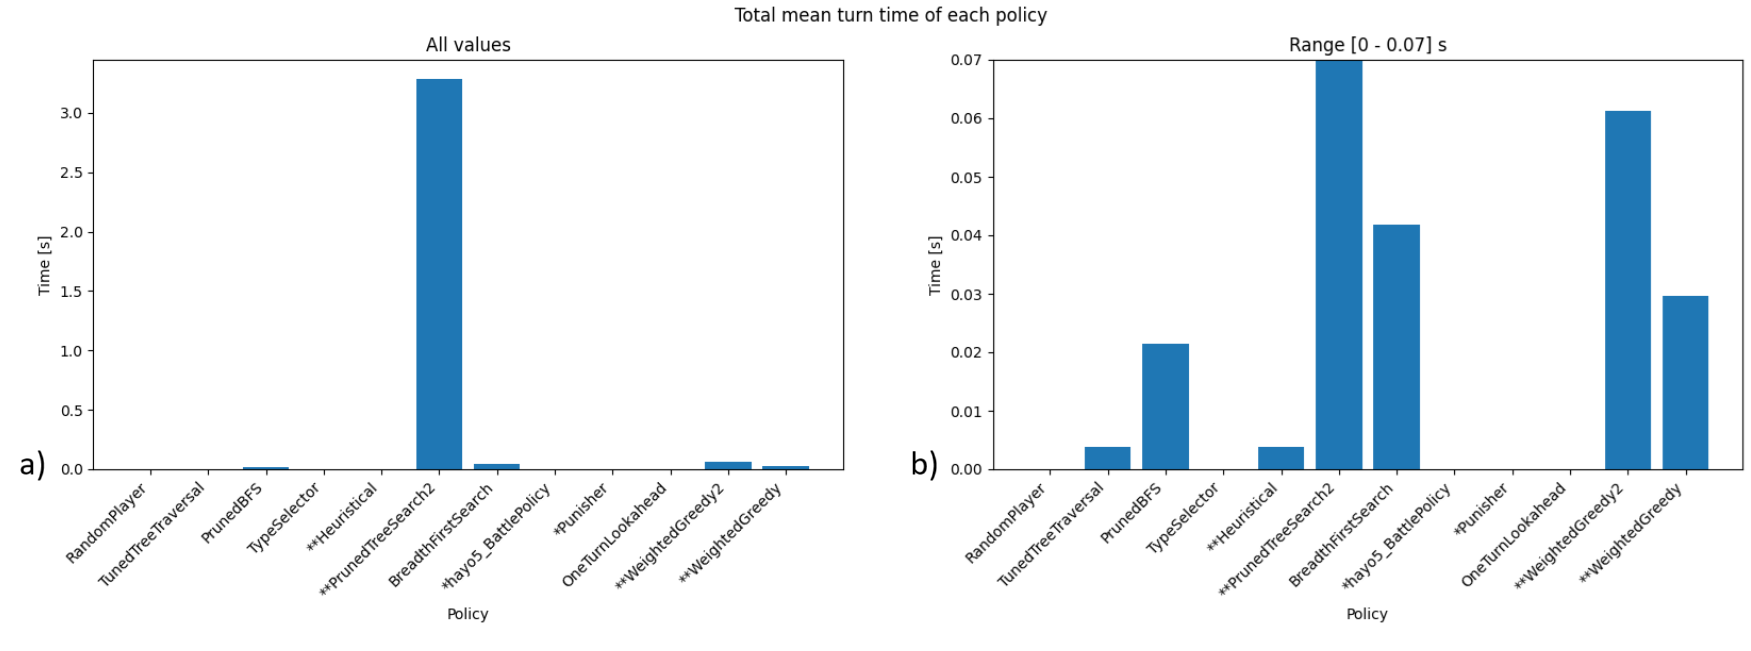
###### **Figure 3**: Mean time to perform a turn for each policy. **a)** All values range, **b)** Range [0 - 0.07] s 

### 6. Try the code

In the following section is possile to try out the code and simulate Pokémon battles with the implemented policies.

#### 6.1 Initialize framework and policies

In order to start the simulation it is necessary to initialize the framework and the policies. Run the following code to do so:

In [1]:
import sys, os
# add relative parent directory to path
sys.path.append(os.path.dirname(os.getcwd()))


from vgc.behaviour.BattlePolicies import *
from policies.PrunedTreeSearch import PrunedTreeSearch, PrunedTreeSearch2
from policies.Heuristical import Heuristical
from policies.WeightedGreedy import WeightedGreedy, WeightedGreedy2
from utils import OwnRandomTeamGenerator, MyPkmEnv

policies = [RandomPlayer, OneTurnLookahead, 
            TypeSelector, BreadthFirstSearch,
            PrunedBFS, TunedTreeTraversal, 
            PrunedTreeSearch, PrunedTreeSearch2,
            WeightedGreedy, WeightedGreedy2,
            Heuristical]

#### 6.2 Generate environment

##### 6.2.1 Generate teams

Run the cell below to generate two random teams. Such teams are generated by the class *OwnRandomTeamGenerator()*, which randomly selects the characteristics of the moves for the Pokémon in the team. The *get_team()* method of this class returns a team whose pokémon have movesets with different accuracies, which in the original framework were always set to 1. By introducing this non-deterministic element, we increased the complexity of the game.

In [2]:
team1 = OwnRandomTeamGenerator().get_team().get_battle_team([0, 1, 2])
team2 = OwnRandomTeamGenerator().get_team().get_battle_team([0, 1, 2])

##### 6.2.2 Initialize agents

Run the cell below to initialize the agents. The agents can be chosen among the pre-implemented policies and the ones developed by us.

In [3]:
agent1 = PrunedTreeSearch2      ## INSERT POLICY FOR TEAM 1
agent2 = RandomPlayer           ## INSERT POLICY FOR TEAM 2

##### 6.2.3 Initialize whole environment

Run the cell below to initialize the environment with the two teams and the agents.
Remember to re-run this cell if the teams are re-generated. The environment is thus ready to simulate the battle!

In [4]:
env = MyPkmEnv((team1, team2),
    encode=(agent1().requires_encode(), agent2().requires_encode()),
    debug=True)  # set new environment with teams
s, _ = env.reset()
terminated = False

#### 6.3 Simulate battle

##### 6.3.1 View current teams stats

The following code allows to visualize the stats of the teams any time in the simulation. e.g. the moves of the pokemons, the accuracy of the moves, the power of the moves, the type of the moves, the name of the pokemons, the hp of the pokemons, the active pokemon and the party of the pokemons.

In [ ]:
print("Team 0:")
print(s[0].teams[0])
print("Team 1:")
print(s[1].teams[0])

##### 6.3.2 Simulate a turn

Run the cell below to simulate a turn in the Pokémon battle. The selected moves for each team will be displayed, and the environment will be updated accordingly. If the battle is over, the final log will be printed.

In [ ]:
if not terminated:
    move_team_0 = agent1().get_action(s[0])
    move_team_1 = agent2().get_action(s[1])

    print("Team 0 move:")
    if move_team_0 < 4:
        print(s[0].teams[0].active.moves[move_team_0])
    else:
        print("Switch to", s[0].teams[0].party[move_team_0 - 4])
    
    print("Team 1 move:")
    if move_team_1 < 4:
        print(s[1].teams[0].active.moves[move_team_1])
    else:
        print("Switch to", s[1].teams[0].party[move_team_1 - 4])

    print()

    s, _, terminated, _, _ = env.step((move_team_0, move_team_1))
    print(env.log)
else:
    print(env.log)
    print("Battle is over!")

### 7. Conclusions

We designed and implemented four algorithms, of which one performs a three search and the others use a greedy approach. We evaluated them combining measures about win rate, number of turns and time to perform a turn, comparing them to other eight strategies. <br>
From **Figure 1** is evident a distinction of win rate between tree search and greedy approach (with the exception of the weakest greedy approaches, *TypeSelector* and *Heuristical*), with the latter's advantantage. As anticipated in section 5., this is probably due to the task structure: with a randomly generated team it's unlikely to have a combination of moves and Pokémons particularly efficent, and the best move is often the one which maximize our utility in the current turn. <br>
Our *WeightedGreedy* and *WeightedGreedy2* have similar (and good) values regarding win rate and number of turns, but the first is much faster, making it the best policy. Anyway, we think that *WeightedGreedy2* is a good policy, and that the choice between the two could depend on the opponent type. For exemple, in **Figure 1** we can see that *WeightedGreedy2* is better against *TunedTreeTraversal*.

### 8 Appendix

#### 8.1 Team contribution:

- **Vito** modified the environment, added accuracy randomness
- **Su Qi** and **Salvatore** worked on implementation of *PrunedTreeSearch*
- **Su Qi** implemented *WeightedGreedy1-2*
- **Antonio** implemented *Heuristical*
- **Matilde** carried out initial analyses and final assessment <br>

Everyone contibuted on idea development, bug fixing and report writing.

#### 8.2 Relationship with the course 

This task is set within the context of adversarial games, a topic explored in the course. We chose to address it using search algorithms, which were extensively covered during the lectures. In particular, we implemented a variation of tree search algorithm with alpha-beta pruning and greedy search technique.
